IMPORTING LIBRARIES AND DATASET

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [139]:
data = pd.read_csv("/home/shivaprakash/Documents/git/Machine-Learning/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


EXPLORATORY DATA ANALYSIS

In [53]:
data.shape

(891, 12)

In [54]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
edata = data.copy()

DATA CLEANING

1 . Missing/Null values handling

    Methods to handle :
    a) Remove 
    b) Impute - mean , median , mode , frequency , function mapping  


In [14]:
#remove

edata.dropna(axis=1 , inplace=True)
edata

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


In [16]:
#IMPUTE

#MEAN

edata['Age'].fillna(edata['Age'].mean() , inplace=True)
edata['Age'].isnull().sum()

0

In [19]:
#MEDIAN

edata['Age'].fillna(edata['Age'].median() , inplace=True)
edata['Age'].isnull().sum()

0

In [46]:
#MODE

edata['Embarked'].fillna(edata['Embarked'].mode()[0] , inplace=True)
edata['Embarked'].isnull().sum()

0

In [47]:
#FUNCTION MAPPING

import re
for i , name in enumerate( edata['Name']):
  if (re.search(r'Mr\.',string= str(name)) or re.search(r'Mrs\.',string= str(name)) or re.search(r'Dr\.',string= str(name))) and (pd.isna(edata.loc[i,'Age'])):
    edata.loc[i,'Age']= 35
  elif (re.search(r'Miss',string= str(name)) or re.search(r'Master.',string= str(name))) and (pd.isna(edata.loc[i,'Age'])):
    edata.loc[i,'Age']= 17


In [42]:
edata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,17.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [140]:
#originaldata working

data['Embarked'].fillna(data['Embarked'].mode()[0] , inplace=True)

data = data.drop('Cabin', axis=1)

import re
for i , name in enumerate( data['Name']):
  if (re.search(r'Mr\.',string= str(name)) or re.search(r'Mrs\.',string= str(name)) or re.search(r'Dr\.',string= str(name))) and (pd.isna(data.loc[i,'Age'])):
    data.loc[i,'Age']= 35
  elif (re.search(r'Miss',string= str(name)) or re.search(r'Master.',string= str(name))) and (pd.isna(data.loc[i,'Age'])):
    data.loc[i,'Age']= 17

In [141]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,17.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [142]:
edata=data.copy()

2.OUTLIER REMOVAL

    -> Highly Deviated data from the rest of the datasets
    -> Affects the model learning process
    -> Can be identified by visualization techniques
    -> Ways to remove:
        a) z-score - similar to standard scaler in sklearn
        b) IQR - drop , cap 
    

<Axes: xlabel='PassengerId', ylabel='Age'>

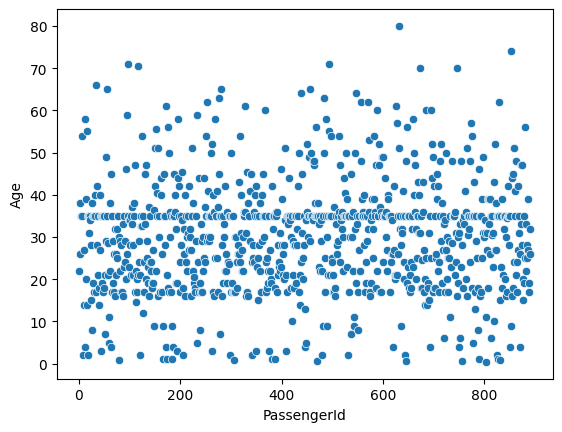

In [63]:
#visualization

sns.scatterplot(x=edata['PassengerId'] , y= edata['Age'])

In [64]:
edata.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

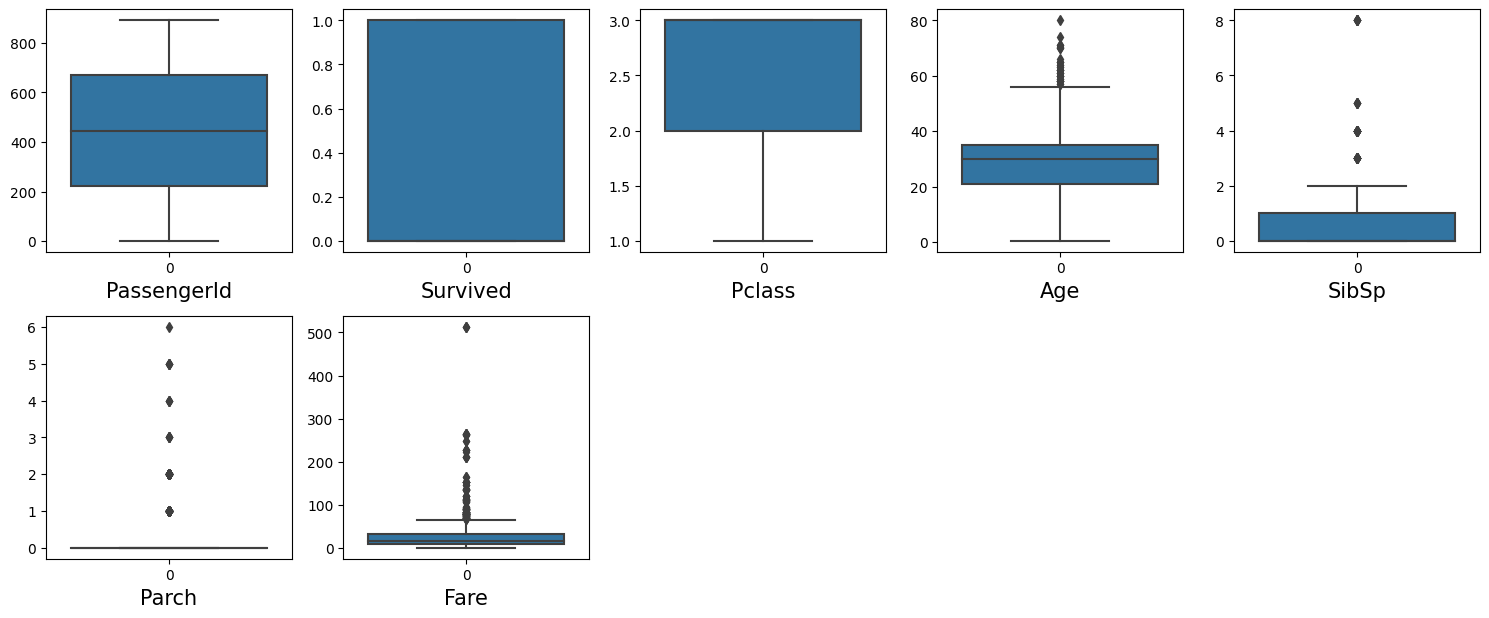

In [66]:
columns = ['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']

plt.figure(figsize=(15,15))
plotnumber=1

for col in columns:
  if plotnumber<=8:
    ax=plt.subplot(5,5,plotnumber)
    sns.boxplot(edata[col])
    plt.xlabel(col,fontsize=15)
  plotnumber+=1
plt.tight_layout()

In [143]:
#IQR

iqr_fare = edata['Fare'].quantile(0.75) - data['Fare'].quantile(0.25)
low_f = data['Fare'].quantile(0.5) - 1.5 * iqr_fare
high_f = 300

In [144]:
low_f

-20.1802

In [145]:
data['Fare'] = np.where(
    data['Fare'] > high_f,
    high_f,
    np.where(
        data['Fare'] < low_f,
        low_f,
        data['Fare']
    )
)


<Axes: xlabel='Fare'>

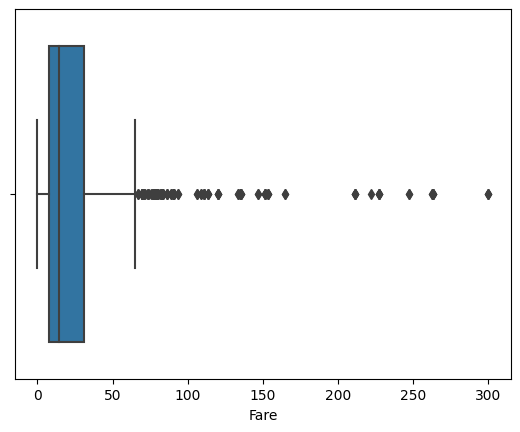

In [146]:
sns.boxplot(x=data['Fare'])

In [147]:
np.where( (data['Survived']==0) & (data['Age']>60) )

(array([ 33,  54,  96, 116, 170, 252, 280, 326, 438, 456, 493, 545, 555,
        625, 672, 745, 851]),)

In [148]:
data['Age'] = np.where(data['Age'] > 60,60,data['Age'])


<Axes: xlabel='Age'>

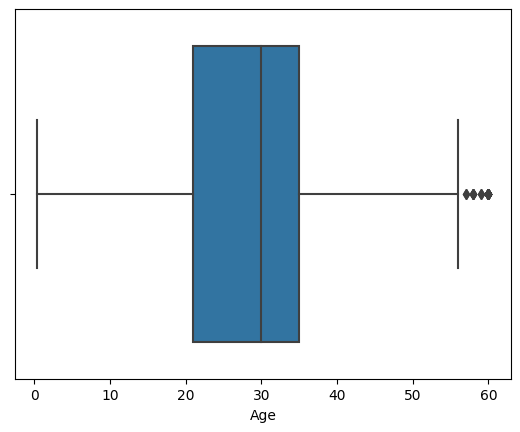

In [151]:
sns.boxplot(x=data['Age'])

3. DATA TYPE SETTING

    1. This step is crucial because data may be imported from various sources or collected from different systems, and it might not always be in the desired format for analysis or modeling

        - >Converting Strings to Numbers     #df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
        - >Converting Strings to Datetime    #df['Date'] = pd.to_datetime(df['Date'])
        - >Converting Categorical Data to Numeric    #df = pd.get_dummies(df, columns=['Color'])
        - >Converting Numbers to Strings     #df['ID'] = df['ID'].astype(str)
        - >Converting Timestamps to Specific Formats     #df['Formatted_Date'] = df['Timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [153]:
edata=data.copy()

DATA PREPROCESSING

1. ENCODING :
     - > Used to convert continuous data into categorical data and vice versa
     - > Processes involved :
         >OneHot Encoder ,
         >Label Encoder ,
         >Integer Encoder 